In [2]:
import folium
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager,rc

In [4]:
font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)
plt.rcParams['font.size'] = 14
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus']=False

In [5]:
emart_df=pd.read_csv('C:/MartRepository/4Mart/data/Emart_info.csv',encoding='utf-8')

In [6]:
lotte_df=pd.read_csv('C:/MartRepository/4Mart/data/lotte.csv',encoding='utf-8')

In [7]:
home_df=pd.read_csv('C:/MartRepository/4Mart/data/Homeplus_shop_info_loc4.csv',encoding='utf-8')


In [8]:
top_df=pd.read_csv('C:/MartRepository/4Mart/data/topmart_shop_info_loc.csv',encoding='utf-8')


In [9]:
mart_df=pd.concat([lotte_df, emart_df,home_df,top_df],axis=0) 

In [10]:
mart_df.to_csv('./mart.csv',encoding='utf-8',index=False)

In [11]:
mart_df = pd.read_csv('./mart.csv',encoding='utf-8')
mart_df.head()

,store,address,Latitude,Longitude,tel
0,롯데마트 TRU동부산점,부산광역시 기장군 기장읍 기장해안로 147 롯데몰동부산점 3층,35.218819,129.231369,051-922-2500
1,롯데마트 TRU파주점,"경기도 파주시 문발로 302 A블럭 3층(문발동, 롯데프리미엄아울렛)",37.720410,126.693622,031-960-2750
2,롯데마트 marketD수원점,경기도 수원시 권선구 세화로 134 롯데마트,37.265378,126.995983,031-8067-2500
3,롯데마트 강변점,서울특별시 광진구 광나루로56길 85 롯데마트,37.534937,127.095709,02-3424-2500
4,롯데마트 거제점,경상남도 거제시 서간도길 9-9 (옥포동),34.888501,128.689184,055-641-2500


In [12]:
mart_df['brand']=mart_df['store'].str.split().str[0]

In [14]:
mart_df

,store,address,Latitude,Longitude,tel,brand
0,롯데마트 TRU동부산점,부산광역시 기장군 기장읍 기장해안로 147 롯데몰동부산점 3층,35.218819,129.231369,051-922-2500,롯데마트
1,롯데마트 TRU파주점,"경기도 파주시 문발로 302 A블럭 3층(문발동, 롯데프리미엄아울렛)",37.720410,126.693622,031-960-2750,롯데마트
2,롯데마트 marketD수원점,경기도 수원시 권선구 세화로 134 롯데마트,37.265378,126.995983,031-8067-2500,롯데마트
3,롯데마트 강변점,서울특별시 광진구 광나루로56길 85 롯데마트,37.534937,127.095709,02-3424-2500,롯데마트
4,롯데마트 거제점,경상남도 거제시 서간도길 9-9 (옥포동),34.888501,128.689184,055-641-2500,롯데마트
...,...,...,...,...,...,...
455,탑마트 서진주점,경상남도 진주시 새평거로 136 (평거동 921),35.181392,128.069798,055)743-6300,탑마트
456,탑마트 대구점,대구광역시 중구 중앙대로 66길 20 (효성해링턴 지하),35.862074,128.594685,053)251-5000,탑마트
457,탑마트 물금역점,"경상남도 양산시 물금읍 물금중앙길 18 (구, 물금시장)",35.309926,128.984952,055-387-3008,탑마트
458,탑마트 경주용강점,경상북도 경주시 산업로 4348 (용강동),35.870536,129.231939,054)744-5501~2,탑마트


In [13]:
mart_df=mart_df[['brand','store','address','Latitude','Longitude','tel']]
mart_df

,brand,store,address,Latitude,Longitude,tel
0,롯데마트,롯데마트 TRU동부산점,부산광역시 기장군 기장읍 기장해안로 147 롯데몰동부산점 3층,35.218819,129.231369,051-922-2500
1,롯데마트,롯데마트 TRU파주점,"경기도 파주시 문발로 302 A블럭 3층(문발동, 롯데프리미엄아울렛)",37.720410,126.693622,031-960-2750
2,롯데마트,롯데마트 marketD수원점,경기도 수원시 권선구 세화로 134 롯데마트,37.265378,126.995983,031-8067-2500
3,롯데마트,롯데마트 강변점,서울특별시 광진구 광나루로56길 85 롯데마트,37.534937,127.095709,02-3424-2500
4,롯데마트,롯데마트 거제점,경상남도 거제시 서간도길 9-9 (옥포동),34.888501,128.689184,055-641-2500
...,...,...,...,...,...,...
455,탑마트,탑마트 서진주점,경상남도 진주시 새평거로 136 (평거동 921),35.181392,128.069798,055)743-6300
456,탑마트,탑마트 대구점,대구광역시 중구 중앙대로 66길 20 (효성해링턴 지하),35.862074,128.594685,053)251-5000
457,탑마트,탑마트 물금역점,"경상남도 양산시 물금읍 물금중앙길 18 (구, 물금시장)",35.309926,128.984952,055-387-3008
458,탑마트,탑마트 경주용강점,경상북도 경주시 산업로 4348 (용강동),35.870536,129.231939,054)744-5501~2


In [14]:
mart_df.to_csv('./mart2.csv',encoding='utf-8',index=False)

<AxesSubplot:xlabel='brand', ylabel='count'>

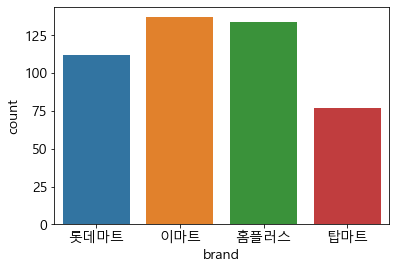

In [15]:
sns.countplot(data=mart_df,x='brand')

In [16]:
mart_df['city']=mart_df['address'].str.split().str[0]
mart_df

,brand,store,address,Latitude,Longitude,tel,city
0,롯데마트,롯데마트 TRU동부산점,부산광역시 기장군 기장읍 기장해안로 147 롯데몰동부산점 3층,35.218819,129.231369,051-922-2500,부산광역시
1,롯데마트,롯데마트 TRU파주점,"경기도 파주시 문발로 302 A블럭 3층(문발동, 롯데프리미엄아울렛)",37.720410,126.693622,031-960-2750,경기도
2,롯데마트,롯데마트 marketD수원점,경기도 수원시 권선구 세화로 134 롯데마트,37.265378,126.995983,031-8067-2500,경기도
3,롯데마트,롯데마트 강변점,서울특별시 광진구 광나루로56길 85 롯데마트,37.534937,127.095709,02-3424-2500,서울특별시
4,롯데마트,롯데마트 거제점,경상남도 거제시 서간도길 9-9 (옥포동),34.888501,128.689184,055-641-2500,경상남도
...,...,...,...,...,...,...,...
455,탑마트,탑마트 서진주점,경상남도 진주시 새평거로 136 (평거동 921),35.181392,128.069798,055)743-6300,경상남도
456,탑마트,탑마트 대구점,대구광역시 중구 중앙대로 66길 20 (효성해링턴 지하),35.862074,128.594685,053)251-5000,대구광역시
457,탑마트,탑마트 물금역점,"경상남도 양산시 물금읍 물금중앙길 18 (구, 물금시장)",35.309926,128.984952,055-387-3008,경상남도
458,탑마트,탑마트 경주용강점,경상북도 경주시 산업로 4348 (용강동),35.870536,129.231939,054)744-5501~2,경상북도


In [17]:
mart_df=mart_df[['brand','store','city','address','Latitude','Longitude','tel']]
mart_df

,brand,store,city,address,Latitude,Longitude,tel
0,롯데마트,롯데마트 TRU동부산점,부산광역시,부산광역시 기장군 기장읍 기장해안로 147 롯데몰동부산점 3층,35.218819,129.231369,051-922-2500
1,롯데마트,롯데마트 TRU파주점,경기도,"경기도 파주시 문발로 302 A블럭 3층(문발동, 롯데프리미엄아울렛)",37.720410,126.693622,031-960-2750
2,롯데마트,롯데마트 marketD수원점,경기도,경기도 수원시 권선구 세화로 134 롯데마트,37.265378,126.995983,031-8067-2500
3,롯데마트,롯데마트 강변점,서울특별시,서울특별시 광진구 광나루로56길 85 롯데마트,37.534937,127.095709,02-3424-2500
4,롯데마트,롯데마트 거제점,경상남도,경상남도 거제시 서간도길 9-9 (옥포동),34.888501,128.689184,055-641-2500
...,...,...,...,...,...,...,...
455,탑마트,탑마트 서진주점,경상남도,경상남도 진주시 새평거로 136 (평거동 921),35.181392,128.069798,055)743-6300
456,탑마트,탑마트 대구점,대구광역시,대구광역시 중구 중앙대로 66길 20 (효성해링턴 지하),35.862074,128.594685,053)251-5000
457,탑마트,탑마트 물금역점,경상남도,"경상남도 양산시 물금읍 물금중앙길 18 (구, 물금시장)",35.309926,128.984952,055-387-3008
458,탑마트,탑마트 경주용강점,경상북도,경상북도 경주시 산업로 4348 (용강동),35.870536,129.231939,054)744-5501~2


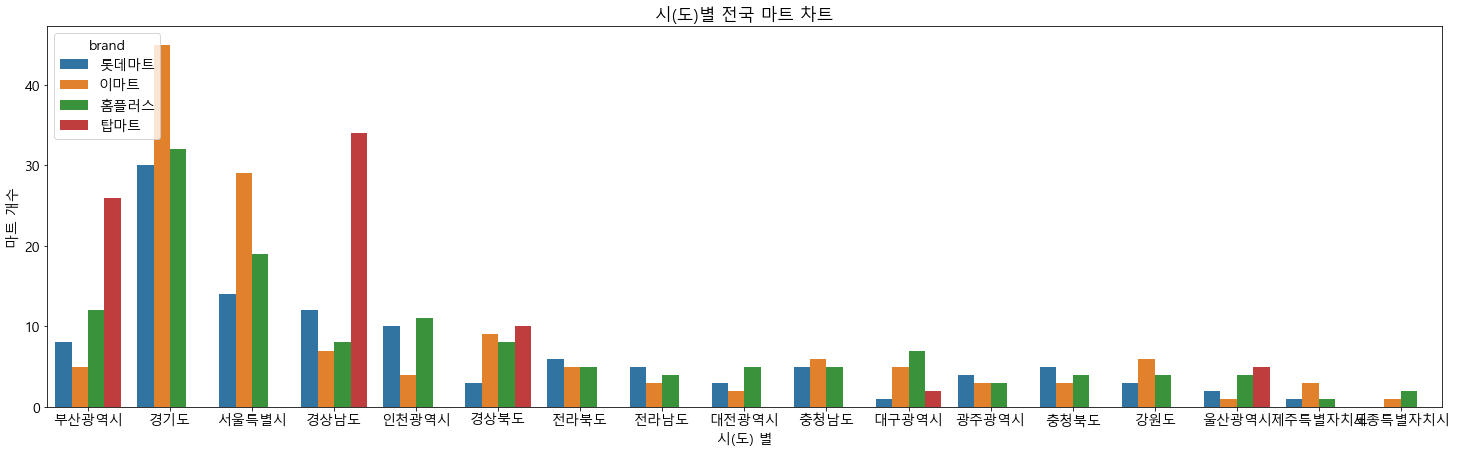

In [168]:
# 시도-마트브랜드 갯수 확인 그래프

plt.figure(figsize=(25, 7))
chart1 = sns.countplot(data=mart_df,x='city', hue='brand')
chart1.set_title('시(도)별 전국 마트 차트')
chart1.set_xlabel('시(도) 별')
chart1.set_ylabel('마트 개수')
plt.show()

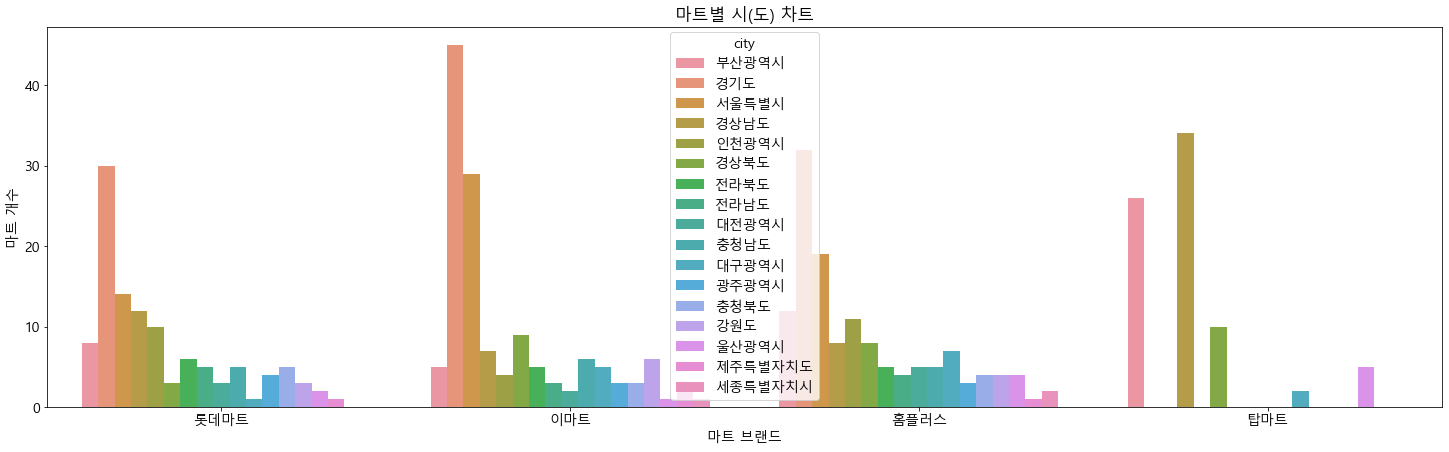

In [169]:
# 시도-마트브랜드 갯수 확인 그래프
plt.figure(figsize=(25, 7))
chart2 = sns.countplot(data=mart_df,x='brand', hue='city')
chart2.set_title('마트별 시(도) 차트')
chart2.set_xlabel('마트 브랜드')
chart2.set_ylabel('마트 개수')
plt.show()

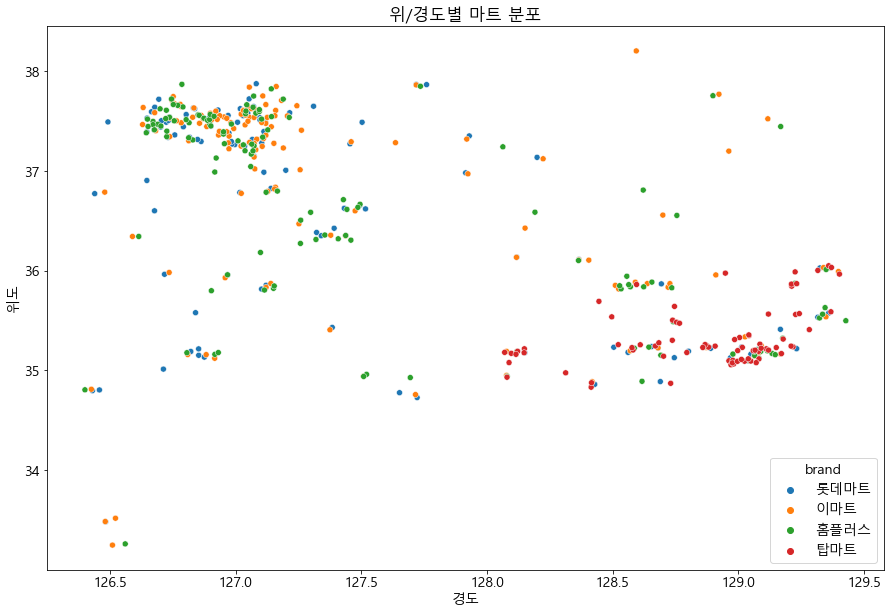

In [171]:
# seaborn의 scatterplot -> x : 경도, y : 위도, hue : 브랜드 시각화
plt.figure(figsize=(15, 10))
chart3 = sns.scatterplot(data=mart_df, x="Longitude", y="Latitude", hue="brand")
chart3.set_title('위/경도별 마트 분포')
chart3.set_xlabel('경도')
chart3.set_ylabel('위도')
plt.show()

### 지도 시각화

In [101]:
# [탑마트 ] 위도 & 경도_평균 

lat = top_df['Latitude'].mean()
long = top_df['Longitude'].mean()
(lat, long)

(35.325333771428575, 128.86781882597404)

In [110]:
# [ 탑마트 ] 지도 시각화

map = folium.Map(location=[lat, long], zoom_start=7, tiles='stamen toner')

for i in top_df.index:
    shop_lat = top_df.loc[i, 'Latitude']
    shop_long = top_df.loc[i, 'Longitude']
    title = top_df.loc[i, 'store']

    folium.CircleMarker(location=[shop_lat, shop_long], radius=3, color='orange',
                        tooltip=title).add_to(map)

map


In [104]:
# [ 4마트 ] 위도 & 경도_평균 

lat = mart_df['Latitude'].mean()
long = mart_df['Longitude'].mean()
(lat, long)

(36.42794226152174, 127.71403986913046)

In [116]:
# [ 4마트 ]

map = folium.Map(location=[lat, long], zoom_start=7, tiles='stamen toner')

for i in mart_df.index:
    shop_lat = mart_df.loc[i, 'Latitude']
    shop_long = mart_df.loc[i, 'Longitude']
    title = mart_df.loc[i, 'store']


    if mart_df.loc[i, 'brand'] == '이마트': color='gray'
    if mart_df.loc[i, 'brand'] == '홈플러스': color='red'
    if mart_df.loc[i, 'brand'] == '롯데마트': color='lightgreen'
    if mart_df.loc[i, 'brand'] == '탑마트': color='red'
    

    folium.CircleMarker(location=[shop_lat, shop_long], radius=5, color=color,
                        tooltip=title).add_to(map)

map

### 지도 시각화

In [120]:
geo_path = './4Mart/Emart/Emart_municipalities_geo_simple.json'

import json
geo_json = json.load(open(geo_path, encoding="utf-8"))

FileNotFoundError: [Errno 2] No such file or directory: './4Mart/Emart/Emart_municipalities_geo_simple.json'

In [118]:
# df_cafe_vs 변수에 담긴 값을 통해 스타벅스의 매장 수를 구합니다.
# "브랜드명"컬럼으로 스타벅스만 가져옵니다.

df_top = mart_df_vs[mart_df_vs["brand"] == "이마트"].copy()
df_top.head()

,brand,city,brand1
16,이마트,강원도,6
17,이마트,경기도,45
18,이마트,경상남도,7
19,이마트,경상북도,9
20,이마트,광주광역시,3


In [121]:
# df_cafe_starbucks 로 스타벅스 매장 수 구하기
# choropleth의 색상은 fill_color = 'YlGn'을 사용합니다.

m = folium.Map([lat, long])

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_top,
    columns=['city', 'brand1'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='탑마트 매장수'
).add_to(m)


NameError: name 'geo_json' is not defined